In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [26]:
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

In [27]:
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [28]:
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))


torch.Size([1, 28, 28])
10000


In [29]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [30]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # write your code here
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128*3*3, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)

    def forward(self, x):
        # write your code here
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = torch.relu(self.conv4(x)) # Removed the last pooling layer
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [31]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name: GOKUL PRAKASH M')
print('Register Number: 212223240041')
summary(model, input_size=(1, 28, 28))

Name: GOKUL PRAKASH M
Register Number: 212223240041
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         AvgPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         AvgPool2d-4             [-1, 32, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          18,496
         AvgPool2d-6             [-1, 64, 3, 3]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
            Linear-8                  [-1, 256]         295,168
            Linear-9                  [-1, 128]          32,896
           Linear-10                   [-1, 64]           8,256
           Linear-11                   [-1, 10]             650
Total params: 434,122
Trainable params: 434,122
Non-trainable params: 0
-------------------------------------------

In [32]:
# Initialize model, loss function, and optimizer
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
## Step 3: Train the Model
def train_model(model, train_loader, num_epochs=3):

    # write your code here
    print('Name: GOKUL PRAKASH M')
    print('Register Number: 212223240041')
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [34]:
# Train the model
train_model(model, train_loader)


Name: GOKUL PRAKASH M
Register Number: 212223240041
Epoch [1/3], Loss: 0.7191
Epoch [2/3], Loss: 0.4478
Epoch [3/3], Loss: 0.3583


In [35]:
## Step 4: Test the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name: GOKUL PRAKASH M')
    print('Register Number: 212223240041')
    print(f'Test Accuracy: {accuracy:.4f}')
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name: GOKUL PRAKASH M')
    print('Register Number: 212223240041')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name: GOKUL PRAKASH M')
    print('Register Number: 212223240041')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

Name: GOKUL PRAKASH M
Register Number: 212223240041
Test Accuracy: 0.8700
Name: GOKUL PRAKASH M
Register Number: 212223240041


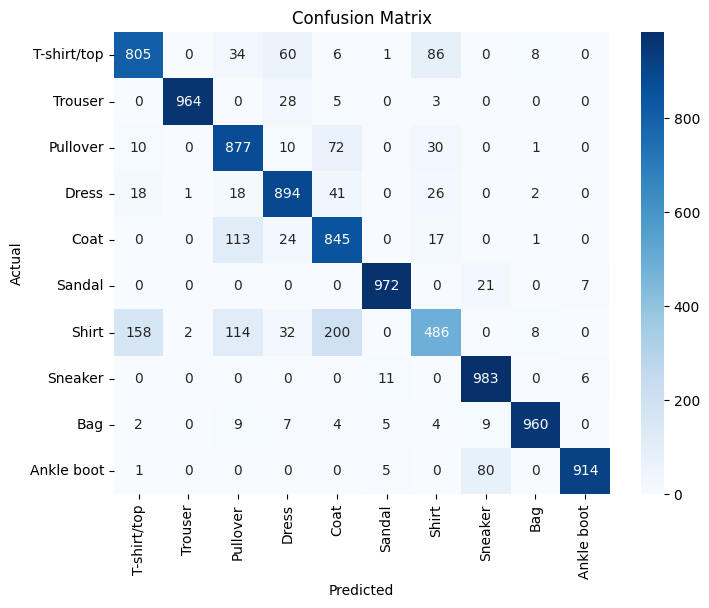

Name: GOKUL PRAKASH M
Register Number: 212223240041
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.75      0.88      0.81      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.72      0.84      0.78      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.49      0.59      1000
     Sneaker       0.90      0.98      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.99      0.91      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [36]:
test_model(model, test_loader)

In [37]:
## Step 5: Predict on a Single Image
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name: GOKUL PRAKASH M')
    print('Register Number: 212223240041')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: GOKUL PRAKASH M
Register Number: 212223240041


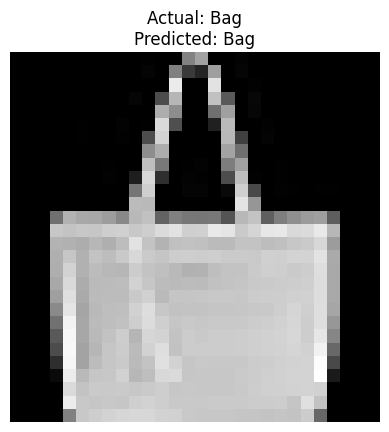

Actual: Bag, Predicted: Bag


In [38]:
predict_image(model, image_index=900, dataset=test_dataset)